Logan Becker

 - Ha
 - Pronob
 - Kate

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due  Thursday 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [3]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [4]:
# Your code here. Add cells as needed.

x_columns = column_names

X = reg_df[x_columns]
y = reg_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

y_pred_train = model_linreg.predict(X_train)
y_pred_test = model_linreg.predict(X_test)
y_pred_all = model_linreg.predict(X)

MSE_train = mean_squared_error(y_train, y_pred_train)
R2_train = model_linreg.score(X_train, y_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
R2_test = model_linreg.score(X_test, y_test)

print(f'Training MSE: {MSE_train}')
print(f'Training R2: {R2_train}')
print(f'Test MSE: {MSE_test}')
print(f'Test R2: {R2_test}')




Training MSE: 103.05216721474271
Training R2: 0.9922649431299668
Test MSE: 68.25326684387336
Test R2: 0.995119907151996


#### Your written answers here

What are your model parameters?
 - The model parameters are X_train and y_train

What were your MSE and R^2?
 - Training MSE: 103.05216721474271
- Training R2: 0.9922649431299668
- Test MSE: 68.25326684387336
- Test R2: 0.995119907151996



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [5]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')




True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


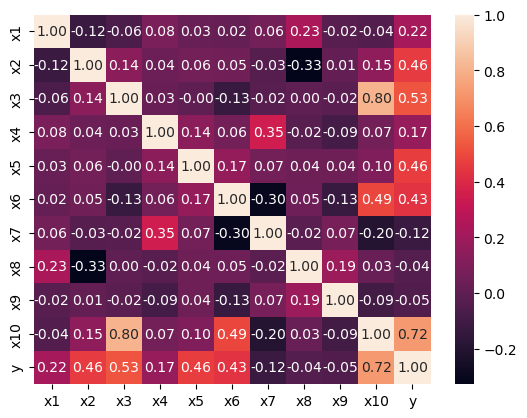

In [6]:

corr = reg2_df.corr() #creating a confusion matrix to see corelation between variables, each variable is corrlated with itself so the diagonal is 1, signficant has some postive corlation with x3 and x6

sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

In [7]:
#candidate_idx = [0,1,2,3,4,5,9]
candidate_idx = [0,1,3,4,5]
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]
Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

#R2
R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)
print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')

#MSE
y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE_train: {MSE_train:.2f}')
print(f'MSE_test: {MSE_test:.2f}')


R2_train: 0.60
R2_test: 0.52
MSE_train: 29.64
MSE_test: 33.35


In [8]:
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.21 + 52.19*x1 + 91.41*x2 + 8.28*x4 + 57.68*x5 + 64.32*x6


#### Your written answers here

What are your model parameters?
 - -15.62 and -15.47

Which features (x1, x2...) were significant? Which were co-linear?
 - Significant X2, X3, X5, X6, X10
 - co-linear X10 and X3, X10 and X6 
 
What were your MSE and R^2?
 - R2_train: 0.60
- R2_test: 0.52
- MSE_train: 29.64
- MSE_test: 33.35



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [9]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head() #Dont use ID and Zipcode 
housing_df.drop(columns = ['id', 'zipcode', 'date'], inplace = True)

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


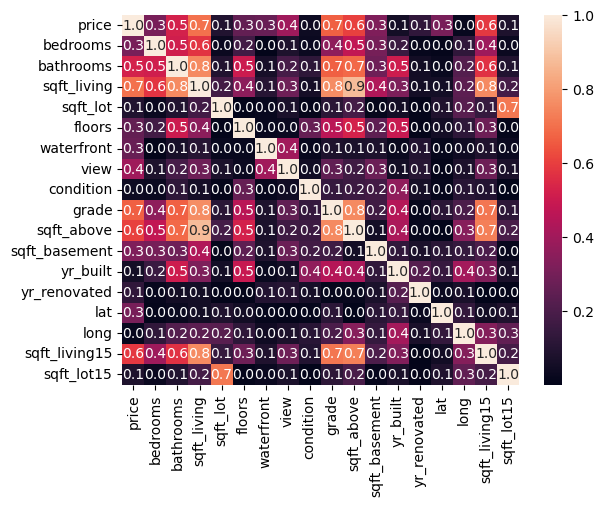

In [10]:
#Creating a corlation matrix to see the relationship between variables
corr = housing_df.corr()
sns.heatmap(np.abs(corr), annot=True, fmt = ".1f")
plt.show()


R2_train: 0.50
R2_test: 0.52


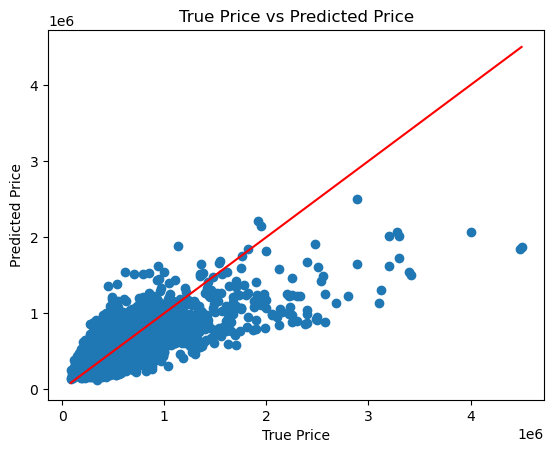

In [11]:
# Your code here. Add cells as needed.
X = housing_df[['sqft_living', 'bedrooms', 'bathrooms']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Scaling the Data 
ss = StandardScaler() 
ss.fit(X_train) #only do this on the training data as to not create bias on your testing data (needs to be data that the model has not seen)
X_sclaed_train = ss.transform(X_train)
X_sclaed_test = ss.transform(X_test)

#Creating the model
model_LR = LinearRegression()
model_LR.fit(X_sclaed_train, y_train)

#Finding R2
R2_train = model_LR.score(X_sclaed_train, y_train)
R2_test = model_LR.score(X_sclaed_test, y_test)

print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')

#Creating the graph 
y_pred = model_LR.predict(X_sclaed_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()


#### Your written answers here
Which features are you using and why?
 
 
 - We used Using sqft_living, bathrooms, grade. We decided to use these as they all have a pretty high corlation to the price in the corelation matrix.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

R2_train: 0.65
R2_test: 0.68
['lat', 'grade', 'sqft_living']
lat: 59086.222049656375
grade: 100493.13364984965
sqft_living: 151115.8434531654


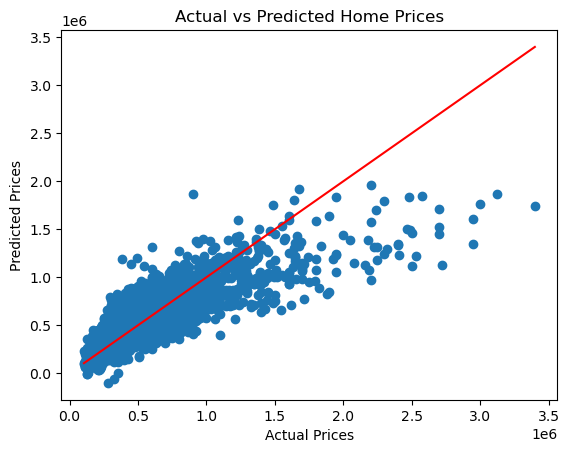

In [15]:
# Your code here. Add cells as needed.
y = housing_df['price']
X = housing_df.drop(columns = ['price'])
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Scaling the Data
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

#Creating the model
model_lasso = Lasso(alpha = 30000, max_iter = 10000)   
model_lasso.fit(X_scaled_train, y_train)

#Finding R2 (diffrent features form convergance)
R2_train = model_lasso.score(X_scaled_train, y_train)
R2_test = model_lasso.score(X_scaled_test, y_test)
print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')

#Getting the cofficents
coef = model_lasso.coef_
top_3 = np.argsort(np.abs(coef))[-3:]
top_3_names = feature_names[top_3].to_list()
print(top_3_names)
for name in top_3_names:
    print(f"{name}: {coef[feature_names.get_loc(name)]}") #lat, grade, and sqft_living are the top 3 features

#Plotting predicted vs actual home values 
y_pred = model_lasso.predict(X_scaled_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red')


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.show()


### Your written answers here
Which regression did you use?
 - I used lasso regression 

Does your regularized model look better than your MLR? How so?
 - Yes, it does look better. When looking at the red line for the regularized model, it is fitted more closely around the perfect prediction. When compared to the normal model, it seems like there is a lot more variance around the line compared to the regularized model.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

R2_train_below_1M: 0.69
R2_test_below_1M: 0.69
R2_train_above_1M: 0.55
R2_test_above_1M: 0.28


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+12, tolerance: 5.145e+10
  model = cd_fast.enet_coordinate_descent(


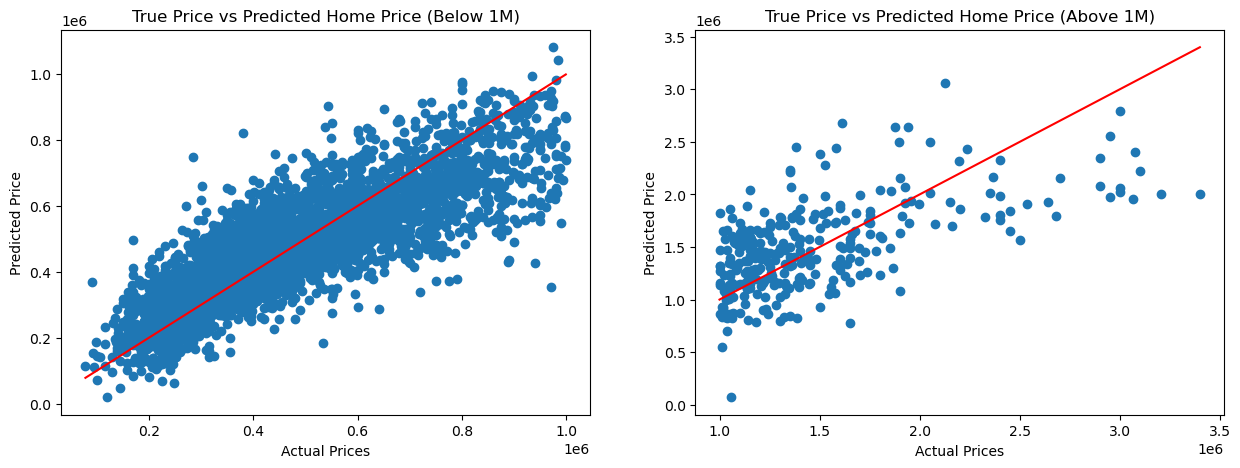

In [14]:
# Your code here. Add cells as needed.
#Splitting the data (above and below 1M)
below_1M = housing_df[housing_df['price'] < 1_000_000]
above_1M = housing_df[housing_df['price'] >= 1_000_000]

#Creating a lasso model for both data sets 
X_below_1M = below_1M.drop(columns=['price'])
y_below_1M = below_1M['price']
X_above_1M = above_1M.drop(columns=['price'])   
y_above_1M = above_1M['price']
X_train_below_1M, X_test_below_1M, y_train_below_1M, y_test_below_1M = train_test_split(X_below_1M, y_below_1M, test_size = 0.2)
X_train_above_1M, X_test_above_1M, y_train_above_1M, y_test_above_1M = train_test_split(X_above_1M, y_above_1M, test_size = 0.2)

#Scaling the data
ss = StandardScaler()
ss.fit(X_train_below_1M)
X_scaled_train_below_1M = ss.transform(X_train_below_1M)
X_scaled_test_below_1M = ss.transform(X_test_below_1M)
ss.fit(X_train_above_1M)
X_scaled_train_above_1M = ss.transform(X_train_above_1M)
X_scaled_test_above_1M = ss.transform(X_test_above_1M)

#Creating the model
model_lasso_below_1M = Lasso(alpha = 15, max_iter = 10000)
model_lasso_below_1M.fit(X_scaled_train_below_1M, y_train_below_1M)
model_lasso_above_1M = Lasso(alpha = 2, max_iter = 10000)
model_lasso_above_1M.fit(X_scaled_train_above_1M, y_train_above_1M)

#Finding R2
R2_train_below_1M = model_lasso_below_1M.score(X_scaled_train_below_1M, y_train_below_1M)
R2_test_below_1M = model_lasso_below_1M.score(X_scaled_test_below_1M, y_test_below_1M)
R2_train_above_1M = model_lasso_above_1M.score(X_scaled_train_above_1M, y_train_above_1M)
R2_test_above_1M = model_lasso_above_1M.score(X_scaled_test_above_1M, y_test_above_1M)
print(f'R2_train_below_1M: {R2_train_below_1M:.2f}')
print(f'R2_test_below_1M: {R2_test_below_1M:.2f}')
print(f'R2_train_above_1M: {R2_train_above_1M:.2f}')
print(f'R2_test_above_1M: {R2_test_above_1M:.2f}')

#Plotting predicted vs actual home values for each set 
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
y_pred = model_lasso_below_1M.predict(X_scaled_test_below_1M)
plt.scatter(y_test_below_1M, y_pred)
plt.plot([y_test_below_1M.min(), y_test_below_1M.max()], [y_test_below_1M.min(), y_test_below_1M.max()], color = 'red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Home Price (Below 1M)')
plt.subplot(1, 2, 2)
y_pred = model_lasso_above_1M.predict(X_scaled_test_above_1M)
plt.scatter(y_test_above_1M, y_pred)
plt.plot([y_test_above_1M.min(), y_test_above_1M.max()], [y_test_above_1M.min(), y_test_above_1M.max()], color = 'red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Home Price (Above 1M)')
plt.show()



 ### Your written answers here

 What are the $R^2$ for the two models?

  - R2_train_below_1M: 0.69, 
- R2_test_below_1M: 0.69
- R2_train_above_1M: 0.52
- R2_test_above_1M: 0.51
 
